In [1]:
import fiftyone as fo

In [3]:
train_data_path = "/home/s825860045/Datasets/CarDD_release/CarDD_COCO/train2017"
train_labels_path = "/home/s825860045/Datasets/CarDD_release/CarDD_COCO/annotations/instances_train2017.json"

In [15]:
train_dataset = fo.Dataset.from_dir(
    dataset_type=fo.types.COCODetectionDataset,
    data_path=train_data_path,
    labels_path=train_labels_path,
    label_field="ground_truth",
    label_types="segmentations",
    include_id=True
)

 100% |███████████████| 2816/2816 [17.7s elapsed, 0s remaining, 168.1 samples/s]      


In [5]:
train_dataset

Name:        2023.12.03.18.26.09
Media type:  image
Num samples: 2816
Persistent:  False
Tags:        []
Sample fields:
    id:                         fiftyone.core.fields.ObjectIdField
    filepath:                   fiftyone.core.fields.StringField
    tags:                       fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:                   fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth_segmentations: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    ground_truth_coco_id:       fiftyone.core.fields.IntField

In [17]:
train_dataset_counts = train_dataset.count_values("ground_truth_segmentations.detections.label")
train_dataset_counts

{'crack': 651,
 'tire flat': 225,
 'glass shatter': 475,
 'scratch': 2560,
 'dent': 1806,
 'lamp broken': 494}

In [6]:
validation_data_path = "/home/s825860045/Datasets/CarDD_release/CarDD_COCO/val2017"
validation_labels_path = "/home/s825860045/Datasets/CarDD_release/CarDD_COCO/annotations/instances_val2017.json"

In [7]:
validation_dataset = fo.Dataset.from_dir(
    dataset_type=fo.types.COCODetectionDataset,
    data_path=validation_data_path,
    labels_path=validation_labels_path,
    label_field="ground_truth",
    label_types="segmentations",
    include_id=True
)

 100% |█████████████████| 810/810 [5.0s elapsed, 0s remaining, 162.0 samples/s]      


In [8]:
validation_dataset

Name:        2023.12.03.18.34.10
Media type:  image
Num samples: 810
Persistent:  False
Tags:        []
Sample fields:
    id:                         fiftyone.core.fields.ObjectIdField
    filepath:                   fiftyone.core.fields.StringField
    tags:                       fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:                   fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth_segmentations: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    ground_truth_coco_id:       fiftyone.core.fields.IntField

In [10]:
test_data_path = "/home/s825860045/Datasets/CarDD_release/CarDD_COCO/test2017"
test_labels_path = "/home/s825860045/Datasets/CarDD_release/CarDD_COCO/annotations/instances_test2017.json"

In [11]:
test_dataset = fo.Dataset.from_dir(
    dataset_type=fo.types.COCODetectionDataset,
    data_path=test_data_path,
    labels_path=test_labels_path,
    label_field="ground_truth",
    label_types="segmentations",
    include_id=True
)

 100% |█████████████████| 374/374 [2.2s elapsed, 0s remaining, 173.2 samples/s]      


In [12]:
test_dataset

Name:        2023.12.03.18.35.40
Media type:  image
Num samples: 374
Persistent:  False
Tags:        []
Sample fields:
    id:                         fiftyone.core.fields.ObjectIdField
    filepath:                   fiftyone.core.fields.StringField
    tags:                       fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:                   fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth_segmentations: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    ground_truth_coco_id:       fiftyone.core.fields.IntField

In [28]:
full_dataset = None

In [30]:
full_dataset = train_dataset.clone()
full_dataset.add_samples(validation_dataset)
full_dataset.add_samples(test_dataset)
full_dataset

 100% |█████████████████| 810/810 [4.8s elapsed, 0s remaining, 161.0 samples/s]      
 100% |█████████████████| 374/374 [2.3s elapsed, 0s remaining, 164.5 samples/s]      


Name:        2023.12.03.18.54.01
Media type:  image
Num samples: 4000
Persistent:  False
Tags:        []
Sample fields:
    id:                         fiftyone.core.fields.ObjectIdField
    filepath:                   fiftyone.core.fields.StringField
    tags:                       fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:                   fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth_segmentations: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    ground_truth_coco_id:       fiftyone.core.fields.IntField

In [31]:
full_dataset_counts = full_dataset.count_values("ground_truth_segmentations.detections.label")
full_dataset_counts

{'dent': 2543,
 'glass shatter': 681,
 'scratch': 3595,
 'crack': 898,
 'lamp broken': 704,
 'tire flat': 319}

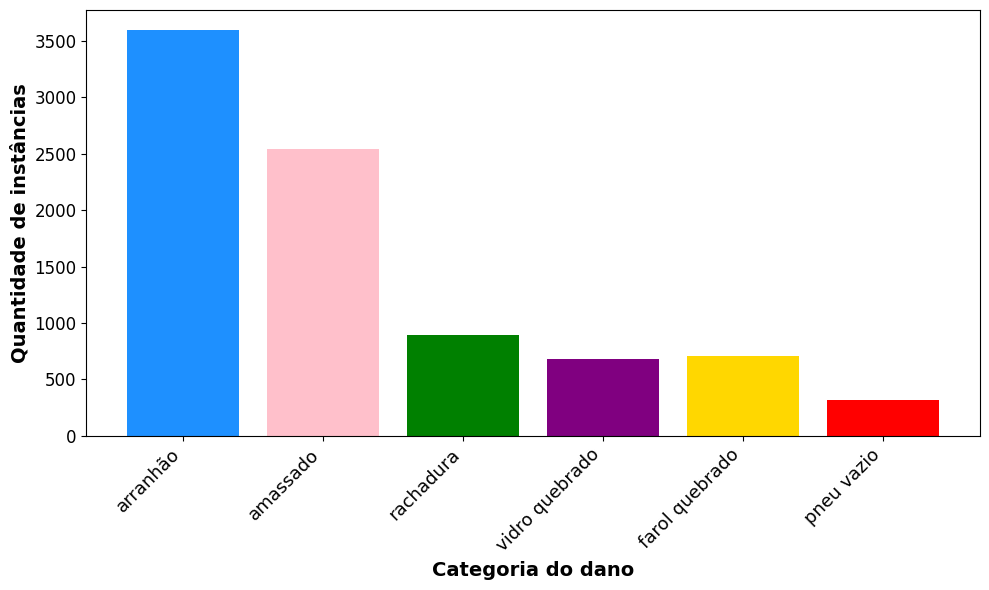

In [49]:
data = {
    'arranhão': 3595,
    'amassado': 2543,
    'rachadura': 898,
    'vidro quebrado': 681,
    'farol quebrado': 704,
    'pneu vazio': 319,
}

labels = list(data.keys())
values = list(data.values())

# Define custom colors for each bar
custom_colors = ['dodgerblue', 'pink', 'green', 'purple', 'gold', 'red']

plt.figure(figsize=(10, 6))  # Set the figure size (width, height)
plt.bar(labels, values, color=custom_colors)  # Specify custom colors for bars

plt.xlabel('Categoria do dano', fontsize=14, fontweight="bold")
plt.ylabel('Quantidade de instâncias', fontsize=14, fontweight="bold")
# plt.title('Quantidade de Instâncias das Diferentes Categorias de Danos')

plt.xticks(rotation=45, ha='right', fontsize=13)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)

plt.tight_layout()  # Adjust layout to prevent cutting off labels

# Save the plot as a PNG file
plt.savefig('fig-instancias-por-categoria.png', dpi=300, bbox_inches='tight')  # Specify the filename and other parameters
plt.show()  # Display the plot (optional)
